In [1]:
from test_dqn_mlp_total import *

In [6]:
all_makespans = []
for instance in instances:
    print(instance)
    env = HeuristicJsspEnv(instance)
    agent = load_agent(instance=instance)
    makespans = []
    makespans.append(get_makespan_of_agent_policy(env=env,agent=agent))
    makespans.append(get_makespan_of_random_policy(env=env,num_simulations=10))
    for rule in range(8):
        makespans.append(get_makespan_of_heuristic_rule(env=env,rule=rule))
    all_makespans.append(makespans)

ft06
la01
la06
la11
la21
la31
la36
orb01
swv01
swv06
swv11
yn1


In [7]:
policies = ['agent', 'random', 'fifo', 'lifo', 'lpt', 'spt', 'ltpt', 'stpt','mor','lor']
df = pd.DataFrame(data = all_makespans,
				index = instances,
				columns = policies)

In [11]:
df

,agent,random,fifo,lifo,lpt,spt,ltpt,stpt,mor,lor
ft06,65,68.4,68,70,77,88,68,83,59,68
la01,675,801.1,830,764,822,751,835,933,763,941
la06,967,1054.0,1078,1031,1125,1200,1098,1012,926,1095
la11,1259,1361.6,1577,1580,1467,1473,1416,1446,1222,1586
la21,1234,1325.8,1417,1479,1451,1324,1278,1541,1251,1547
la31,1819,2031.0,2148,2256,2245,1951,2083,2270,1836,2129
la36,1453,1690.5,1676,1831,1737,1799,1750,1894,1492,1932
orb01,1139,1375.4,1456,1495,1410,1478,1308,1458,1307,1410
swv01,1635,1980.4,1889,2123,2145,1737,1961,1751,1971,1838
swv06,2077,2369.8,2243,2331,2542,2140,2327,2360,2287,2383


In [12]:
df.to_csv("test_dqn_staic.csv")

In [1]:
import os
import torch
from rl.agent import DQNAgent
from gymjsp.jsspenv import HeuristicJsspEnv
from ortools_scheduler import ORtools_scheduler
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from copy import deepcopy

num_episodes = 1000
memory_size = 100000
batch_size = 64
target_update = 100
noisy = False
plotting_inteval = 10

instances = ["ft06", "la01", "la06", "la11", "la21", "la31", "la36", "orb01", "swv01", "swv06", "swv11", "yn1"]
# num_episodes of swv11 is actually 100, changed to 1000 for implementation simplicity

def load_agent(instance):
    policy_file = f"policies/dqn_mlp/{instance}_num_episodes={num_episodes}_memory_size={memory_size}_target_update={target_update}_noisy={noisy}_cycle=8.pth"
    env = HeuristicJsspEnv(instance)
    agent = DQNAgent(env, memory_size, batch_size, target_update, noisy=noisy)
    agent.load_dqn(policy_file)
    return agent

In [2]:
l = []
for instance in instances:
    agent = load_agent(instance=instance)
    x = agent.test()
    print(x)
    l.append(x)

59
675
938
1222
1221
1817
1424
1134
1668
2077
3403
1045


In [4]:
df = pd.read_csv("test_dqn_staic.csv")
l_ = df["agent"]

In [6]:
print(l_)
print(l)

0       65
1      675
2      967
3     1259
4     1234
5     1819
6     1453
7     1139
8     1635
9     2077
10    3504
11    1017
Name: agent, dtype: int64
[59, 675, 938, 1222, 1221, 1817, 1424, 1134, 1668, 2077, 3403, 1045]


<AxesSubplot:>

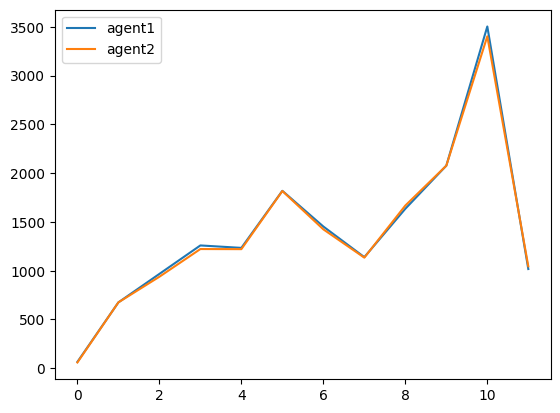

In [5]:
df2 = pd.DataFrame()
df2["agent1"] = l_
df2["agent2"] = l
df2.plot()

In [4]:
# importiong the modules
import pandas as pd
import numpy as np

# creating the Numpy array
array = np.array([[1, 1, 1], [2, 4, 8], [3, 9, 27],
				[4, 16, 64], [5, 25, 125], [6, 36, 216],
				[7, 49, 343]])

# creating a list of index names
index_values = ['first', 'second', 'third',
				'fourth', 'fifth', 'sixth', 'seventh']

# creating a list of column names
column_values = ['number', 'squares', 'cubes']

# creating the dataframe
df = pd.DataFrame(data = array,
				index = index_values,
				columns = column_values)

# displaying the dataframe
print(df)


   number  squares  cubes
0       1        1      1
1       2        4      8
2       3        9     27
3       4       16     64
4       5       25    125
5       6       36    216
6       7       49    343


In [2]:
# instances = ["ft06", "la01", "la06", "la11", "la21", "la31", "la36", "orb01", "swv01", "swv06", "swv11", "yn1"]
# instances = ["swv06"]
num_episodes = 1000
memory_size = 100000
batch_size = 64
target_update = 100
noisy = False
plotting_inteval = 10

#### 随机环境

In [3]:
random_rate = 0.5
cv = 0.2
n = 10 

In [4]:
instance = "swv06"
policy_file = f"policies/dqn_mlp/{instance}_num_episodes={num_episodes}_memory_size={memory_size}_target_update={target_update}_noisy={noisy}.pth"
env = HeuristicJsspEnv(instance)
agent = DQNAgent(env, memory_size, batch_size, target_update, noisy=noisy)
agent.load_dqn(policy_file)

#### 对比随机动作

In [22]:
state = env.reset()
done = False
agent_actions = []
while not done:
    action = agent.select_action(state, determine=True)
    agent_actions.append(int(action))
    next_state, reward, done, info = env.step(action)
    state = next_state
makespan = info["makespan"]
print(f"Agent action, makespan = {makespan}")

Agent action, makespan = 2077


In [91]:
makespans = []
for _ in range(10):
    state = env.reset()
    done = False
    while not done:
        action = np.random.randint(0, 8)
        next_state, reward, done, info = env.step(action)
        state = next_state

    makespan = info["makespan"]
    makespans.append(makespan)
print(f"Random action, makespan = {np.mean(makespans):.2f}")

Random action, makespan = 2375.10


#### 对比 heuristic rule

In [10]:
state = env.reset()
done = False
agent_actions = []
while not done:
    action = 6
    agent_actions.append(int(action))
    next_state, reward, done, info = env.step(action)
    state = next_state
makespan = info["makespan"]
print(f"Agent action=6, makespan = {makespan}")

Agent action=6, makespan = 2287


#### agent train on swv06, test on swv07-swv09

agent

In [6]:
test_instances = [f"swv0{x}" for x in range(7,10)]
for instance in test_instances:
    test_env = HeuristicJsspEnv(instance)
    state = test_env.reset()
    done = False
    while not done:
        action = agent.select_action(state, determine=True)
        next_state, reward, done, info = test_env.step(action)
        state = next_state
    makespan = info["makespan"]
    print(f"On instance {instance}, makespan = {makespan}")

On instance swv07, makespan = 1914
On instance swv08, makespan = 2366
On instance swv09, makespan = 2074


random

In [7]:
test_instances = [f"swv0{x}" for x in range(7,10)]
for instance in test_instances:
    test_env = HeuristicJsspEnv(instance)
    state = test_env.reset()
    done = False
    while not done:
        action = np.random.randint(0, 8)
        next_state, reward, done, info = test_env.step(action)
        state = next_state
    makespan = info["makespan"]
    print(f"On instance {instance}, makespan = {makespan}")

On instance swv07, makespan = 2173
On instance swv08, makespan = 2518
On instance swv09, makespan = 2472


#### 哪些动作做的多

In [25]:
from collections import Counter
for i in Counter(agent_actions).keys():
    print(f"Agent choose action {i} for {Counter(agent_actions)[i]} times")

Agent choose action 3 for 49 times
Agent choose action 6 for 154 times
Agent choose action 7 for 38 times
Agent choose action 5 for 19 times


action | rule  
3        shortest processing time  
6        most operations remaining  
7        least operations remaining  
5        shortest processing time remained  

#### 哪些state重要

In [63]:
model = agent._get_dqn()

In [46]:
state = env.reset()
state = torch.FloatTensor(state).to(agent.device)
state.requires_grad_(True)
print(state)
model.eval()
Q = model(state)

tensor([ 0.0000,  0.0000, -1.0000,  ...,  0.0000,  0.0000,  0.7333],
       device='cuda:0', requires_grad=True)


In [47]:
external_grad = torch.tensor(np.ones(8)).to(agent.device)
Q.backward(gradient=external_grad)

In [50]:
state.grad

tensor([-0.0558,  0.0433, -0.0338,  ..., -0.6092, -1.2825, -0.1516],
       device='cuda:0')

In [51]:
state_grad = state.grad.detach().cpu().numpy()

In [54]:
state_grad.max()

15.880271

In [61]:
np.where(state_grad>3)              # 阈值为 3

(array([   7,   62,   97,  247,  307,  347,  397,  427,  477,  527,  537,
         587,  677,  687,  737,  867,  977, 1297, 1447, 1507, 1517, 1577,
        1597, 1607, 1907, 1917, 2012, 2057, 2077, 2097, 2187, 2357, 2376,
        2467, 2537, 2547, 2677, 2707, 2817, 2846, 2847, 2976], dtype=int64),)

显然agent考虑的主要是 7 结尾的特征，即工件的剩余加工时间

In [76]:
a = np.where(state_grad>1)[0]           # 阈值为 1
a = [x%10 for x in a]
for i in Counter(a).keys():
    print(f"Agent consider state {i} for {Counter(a)[i]} times")

Agent consider state 7 for 100 times
Agent consider state 2 for 78 times
Agent consider state 8 for 43 times
Agent consider state 6 for 64 times


2 - type  
6 - waiting_time  
7 - remain_time  
8 - doable

In [60]:
state_grad[np.where(state_grad>10)]   # 阈值为 10

array([12.657236, 15.880271, 10.319552, 14.00865 , 11.86575 ],
      dtype=float32)

#### 第一个动作，有多重要

In [62]:
for first_action in range(8):
    state = env.reset()
    next_state, reward, done, info = env.step(first_action)
    state = next_state
    while not done:
        action = agent.select_action(state, determine=True)
        next_state, reward, done, info = env.step(action)
        state = next_state
    makespan = info["makespan"]
    print(f"Agent first action is {first_action}, makespan = {makespan}")

Agent first action is 0, makespan = 2049
Agent first action is 1, makespan = 2052
Agent first action is 2, makespan = 2085
Agent first action is 3, makespan = 2077
Agent first action is 4, makespan = 1951
Agent first action is 5, makespan = 2241
Agent first action is 6, makespan = 2049
Agent first action is 7, makespan = 2049


实际agent选择action=3，可以看出不是最好。agent应该学到了根据这些工件的剩余加工时间来调度，

#### enhanced policy by greedy search
greedy can be substituted by MCTS

In [87]:
def get_greedy_action(env_start):
    """Given env_start at some status, simulate the process with first action [0,1,2,3,4,5,6,7]
    and return the action with the lowest makespan.
    """
    makespans = []
    for a in range(8):
        env = deepcopy(env_start)
        next_state, reward, done, info = env.step(a)
        state = next_state
        while not done:
            action = agent.select_action(state, determine=True)
            next_state, reward, done, info = env.step(action)
            state = next_state
        makespans.append(info["makespan"])
    return np.argmin(makespans), makespans

In [89]:
step_size =30

done = False
state = env.reset()
while not done:
    a, makespans = get_greedy_action(env)
    next_state, reward, done, info = env.step(a)
    state = next_state
    print(makespans)
    steps = 0
    while steps < step_size:
        action = agent.select_action(state, determine=True)
        next_state, reward, done, info = env.step(action)
        state = next_state
        steps += 1
        if done:
            break

[2049, 2052, 2085, 2077, 1951, 2241, 2049, 2049]
[1981, 1984, 1984, 1951, 1981, 1984, 1951, 1981]
[2009, 1951, 2009, 1951, 1951, 2009, 1951, 2125]
[1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951]
[1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951]
[1993, 1996, 1951, 1993, 1951, 2013, 1951, 1996]
[1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951]
[1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951]


只有 first action 能优化makespan

In [90]:
step_size =10

done = False
state = env.reset()
while not done:
    a, makespans = get_greedy_action(env)
    next_state, reward, done, info = env.step(a)
    state = next_state
    print(makespans)
    steps = 0
    while steps < step_size:
        action = agent.select_action(state, determine=True)
        next_state, reward, done, info = env.step(action)
        state = next_state
        steps += 1
        if done:
            break

[2049, 2052, 2085, 2077, 1951, 2241, 2049, 2049]
[2082, 2142, 2109, 1951, 2058, 2045, 2000, 2082]
[1951, 2026, 2026, 1951, 1951, 2026, 1951, 1951]
[1951, 2025, 2025, 1951, 2025, 1951, 2025, 1951]
[1951, 2045, 2045, 1951, 2045, 1981, 2045, 1981]


KeyboardInterrupt: 